In [10]:
using CausalForest
using Plots
using StatsBase

In [11]:
indices,X,T,Y = load_data("causal");
Xtest = rand(Float64, (1000, size(X, 2)));
Xtest[:, 1] =  LinRange(0, 1, 1000);
true_effect = Xtest[:, 1].>0.5;

# Subsampling not honest

In [60]:
cf1 = build_forest(false, false, false, Y, T, X, false, -1, 100);
pred1 = apply_forest(cf1, Xtest);

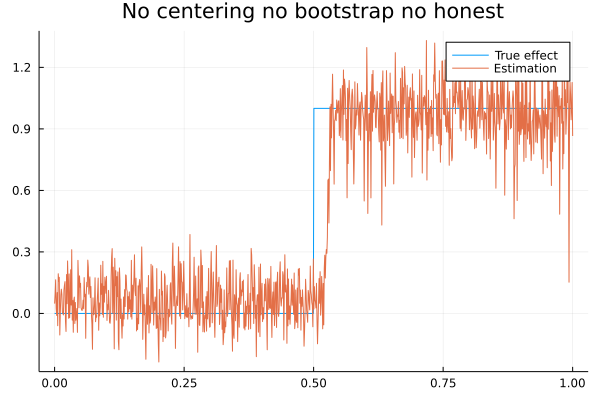

In [13]:
plot(Xtest[:, 1], [true_effect, pred1], label=["True effect" "Estimation"], title = "No centering no bootstrap no honest", fmt = :png)

In [14]:
cf2 = build_forest(true, false, false, Y, T, X, false, -1, 100);
pred2 = apply_forest(cf2, Xtest);

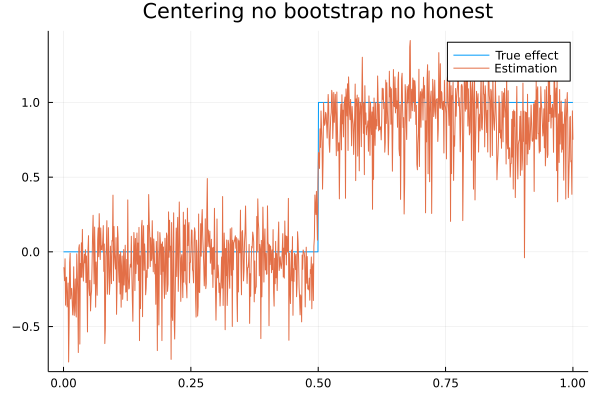

In [15]:
plot(Xtest[:, 1], [true_effect, pred2], label=["True effect" "Estimation"], title = "Centering no bootstrap no honest", fmt = :png)

In [16]:
rmsd(float(true_effect), pred1)

0.2048563713997025

In [17]:
rmsd(float(true_effect), pred2)

0.2364861536288699

# Subsampling honest

In [18]:
cf3 = build_forest(false, false, true, Y, T, X, false, -1, 100);
pred3 = apply_forest(cf3, Xtest);

In [19]:
cf4 = build_forest(true, false, true, Y, T, X, false, -1, 100);
pred4 = apply_forest(cf4, Xtest);

In [20]:
rmsd(float(true_effect), pred3)

0.16961814437086262

In [21]:
rmsd(float(true_effect), pred4)

0.11619100624973903

# Bootstrap not honest

In [22]:
cf5 = build_forest(false, true, false, Y, T, X, false, -1, 100);
pred5 = apply_forest(cf5, Xtest);

In [23]:
cf6 = build_forest(true, true, false, Y, T, X, false, -1, 100);
pred6 = apply_forest(cf6, Xtest);

In [24]:
rmsd(float(true_effect), pred5)

0.21056888201697938

In [25]:
rmsd(float(true_effect), pred6)

0.24800316421866767

# Bootstrap honest

In [26]:
cf7 = build_forest(false, true, true, Y, T, X, false, -1, 100);
pred7 = apply_forest(cf7, Xtest);

In [27]:
cf8 = build_forest(true, true, true, Y, T, X, false, -1, 100);
pred8 = apply_forest(cf8, Xtest);

In [28]:
rmsd(float(true_effect), pred7)

0.1729947153938702

In [29]:
rmsd(float(true_effect), pred8)

0.1324451641305976

# 500 arbres

# Subsampling not honest

In [30]:
cf1 = build_forest(false, false, false, Y, T, X, false, -1, 500);
pred1 = apply_forest(cf1, Xtest);

In [31]:
cf2 = build_forest(true, false, false, Y, T, X, false, -1, 500);
pred2 = apply_forest(cf2, Xtest);

In [32]:
rmsd(float(true_effect), pred1)

0.19703094508899188

In [33]:
rmsd(float(true_effect), pred2)

0.22344640702310514

# Subsampling honest

In [34]:
cf3 = build_forest(false, false, true, Y, T, X, false, -1, 500);
pred3 = apply_forest(cf3, Xtest);

In [35]:
cf4 = build_forest(true, false, true, Y, T, X, false, -1, 500);
pred4 = apply_forest(cf4, Xtest);

In [36]:
rmsd(float(true_effect), pred3)

0.15560843355212703

In [37]:
rmsd(float(true_effect), pred4)

0.12149957801896884

# Bootstrap not honest

In [38]:
cf5 = build_forest(false, true, false, Y, T, X, false, -1, 500);
pred5 = apply_forest(cf5, Xtest);

In [39]:
cf6 = build_forest(true, true, false, Y, T, X, false, -1, 500);
pred6 = apply_forest(cf6, Xtest);

In [40]:
rmsd(float(true_effect), pred5)

0.19580467511572003

In [41]:
rmsd(float(true_effect), pred6)

0.2198202047583864

# Bootstrap honest

In [42]:
cf7 = build_forest(false, true, true, Y, T, X, false, -1, 500);
pred7 = apply_forest(cf7, Xtest);

In [43]:
cf8 = build_forest(true, true, true, Y, T, X, false, -1, 500);
pred8 = apply_forest(cf8, Xtest);

In [44]:
rmsd(float(true_effect), pred7)

0.15562545953536727

In [45]:
rmsd(float(true_effect), pred8)

0.10847229221669082

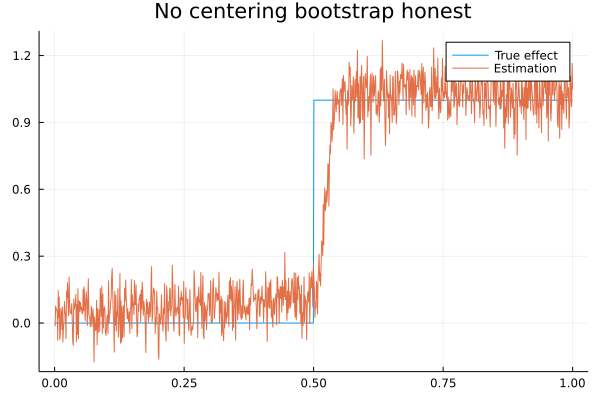

In [46]:
plot(Xtest[:, 1], [true_effect, pred7], label=["True effect" "Estimation"], title = "No centering bootstrap honest", fmt = :png)

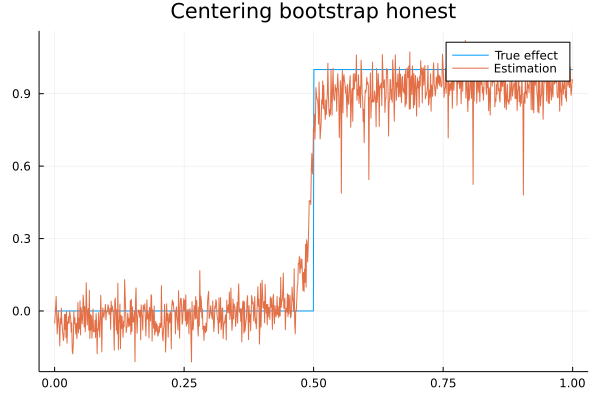

In [47]:
plot(Xtest[:, 1], [true_effect, pred8], label=["True effect" "Estimation"], title = "Centering bootstrap honest", fmt = :png)